In [1]:
from src import AdvSeg, DataGenerator, split_trn_vld_tst
import matplotlib.pyplot as plt
import numpy as np

C:\Users\yuch\Downloads\anaconda3\envs\nz_convnet\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_path = './data/'
dtype = 'sent'
scale = 1.

#### load X-Y samples from block1, and split into train and test sets

In [3]:
X_trn, Y_trn, X_vld, Y_vld, X_tst, Y_tst = split_trn_vld_tst(data_path, vld_rate=0.2, tst_rate=0.1)

split into 621 train, 177 validation, 88 test samples


#### visualize images and labels

Text(0.5,1,'lithological mappinp')

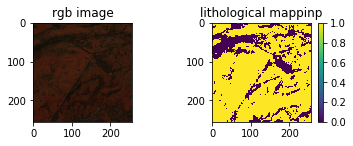

In [4]:
idx = 150
img = np.load(X_trn[idx])
lbl = np.load(Y_trn[idx])

img_rgb = np.transpose(img, [1,2,0])[:,:,::-1][:,:,-3:]
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('rgb image')
plt.subplot(222)
plt.imshow(np.argmax(lbl, axis=0))
plt.colorbar()
plt.title('lithological mappinp')

#### start to build and train Conv2D

In [5]:
conv = AdvSeg(dtype=dtype)

# build Conv2D
conv.build_AdvSegNet(adv_lr=1e-5, seg_lr=1e-3, verbose=True)

# now the tensorboard event file is saved in ./logs
# the training process, graph and statistics can be
# visualize by tensorboard

building Adversarial convolutional net ...
building Segmentation U-net ...
[64, 64, 64, 64]
[64, 64, 64]
summary of seg_model:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        (None, 256, 256, 10) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 256, 256, 64) 5824        image_input[0][0]                
__________________________________________________________________________________________________
alpha_dropout_1 (AlphaDropout)  (None, 256, 256, 64) 0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 256, 256, 64) 36928       alpha_dropout_1[

In [6]:
trn_data = DataGenerator(X_trn, Y_trn, batch_size=10, dtype=dtype, intype=conv.model_type, pred_fn=conv.predict)
vld_data = DataGenerator(X_vld, Y_vld, batch_size=10, dtype=dtype, intype=conv.model_type, pred_fn=conv.predict)

#### check data generator

Text(0.5,1,'label')

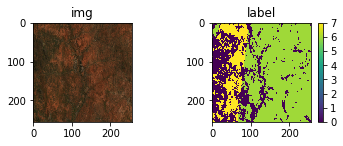

In [7]:
trn_data.phase = 'AdversarialNet'
x, y = trn_data.getitem(1)
xx = x[0]
yy = x[1]
idx = 4
plt.subplot(221)
plt.imshow(2*xx[idx,:,:,:][:,:,::-1][:,:,-3:])
plt.title('img')
plt.subplot(222)
plt.imshow(np.argmax(yy[idx,:,:,:], axis=-1))
plt.colorbar()
plt.title('label')

In [8]:
conv.load_weights('./AdvSeg/sent/weights-159-0.49.hdf5')

In [12]:
conv.fit_model_generator(trn_data, vld_data,
                         adv_epochs=0, adv_steps_per_epoch=10,
                         seg_epochs=60, seg_steps_per_epoch=10,
                         num_round=1)

fitting model AdvSeg
round 0 fitting seg_model


C:\Users\yuch\Downloads\anaconda3\envs\nz_convnet\lib\site-packages\keras\engine\training.py:975: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/60
10/10 [==============================] - 466s 47s/step - loss: 1.5804 - seg_model_loss: 1.4838 - adv_model_freeze_loss: 0.9668 - seg_model_acc: 0.4264 - adv_model_freeze_acc: 0.0500 - val_loss: 1.5830 - val_seg_model_loss: 1.5027 - val_adv_model_freeze_loss: 0.8037 - val_seg_model_acc: 0.4525 - val_adv_model_freeze_acc: 0.3882

Epoch 00001: val_seg_model_acc improved from -inf to 0.45250, saving model to ./AdvSeg/sent/weights-01-0.45.hdf5
Epoch 2/60
10/10 [==============================] - 468s 47s/step - loss: 1.6202 - seg_model_loss: 1.5338 - adv_model_freeze_loss: 0.8643 - seg_model_acc: 0.4140 - adv_model_freeze_acc: 0.2000 - val_loss: 1.5923 - val_seg_model_loss: 1.5079 - val_adv_model_freeze_loss: 0.8438 - val_seg_model_acc: 0.4440 - val_adv_model_freeze_acc: 0.3765

Epoch 00002: val_seg_model_acc did not improve from 0.45250
Epoch 3/60
10/10 [==============================] - 496s 50s/step - loss: 1.5587 - seg_model_loss: 1.4735 - adv_model_freeze_loss: 0.8522 - seg_m


Epoch 00020: val_seg_model_acc did not improve from 0.47429
Epoch 21/60
10/10 [==============================] - 425s 43s/step - loss: 1.5712 - seg_model_loss: 1.4901 - adv_model_freeze_loss: 0.8116 - seg_model_acc: 0.4249 - adv_model_freeze_acc: 0.3200 - val_loss: 1.7133 - val_seg_model_loss: 1.6267 - val_adv_model_freeze_loss: 0.8658 - val_seg_model_acc: 0.4406 - val_adv_model_freeze_acc: 0.3765

Epoch 00021: val_seg_model_acc did not improve from 0.47429
Epoch 22/60
10/10 [==============================] - 424s 42s/step - loss: 1.5867 - seg_model_loss: 1.5127 - adv_model_freeze_loss: 0.7399 - seg_model_acc: 0.4205 - adv_model_freeze_acc: 0.5800 - val_loss: 1.5524 - val_seg_model_loss: 1.4760 - val_adv_model_freeze_loss: 0.7639 - val_seg_model_acc: 0.4601 - val_adv_model_freeze_acc: 0.5000

Epoch 00022: val_seg_model_acc did not improve from 0.47429
Epoch 23/60
10/10 [==============================] - 424s 42s/step - loss: 1.4910 - seg_model_loss: 1.4116 - adv_model_freeze_loss: 0.7

10/10 [==============================] - 433s 43s/step - loss: 1.5041 - seg_model_loss: 1.4326 - adv_model_freeze_loss: 0.7150 - seg_model_acc: 0.4668 - adv_model_freeze_acc: 0.5800 - val_loss: 1.5437 - val_seg_model_loss: 1.4785 - val_adv_model_freeze_loss: 0.6522 - val_seg_model_acc: 0.4722 - val_adv_model_freeze_acc: 0.6235

Epoch 00041: val_seg_model_acc did not improve from 0.47611
Epoch 42/60
10/10 [==============================] - 436s 44s/step - loss: 1.5221 - seg_model_loss: 1.4532 - adv_model_freeze_loss: 0.6890 - seg_model_acc: 0.4435 - adv_model_freeze_acc: 0.5900 - val_loss: 1.5963 - val_seg_model_loss: 1.5337 - val_adv_model_freeze_loss: 0.6265 - val_seg_model_acc: 0.4523 - val_adv_model_freeze_acc: 0.6706

Epoch 00042: val_seg_model_acc did not improve from 0.47611
Epoch 43/60
10/10 [==============================] - 432s 43s/step - loss: 1.5733 - seg_model_loss: 1.5049 - adv_model_freeze_loss: 0.6843 - seg_model_acc: 0.4162 - adv_model_freeze_acc: 0.5900 - val_loss: 1.

In [13]:
conv.fit_model_generator(trn_data, vld_data,
                         adv_epochs=3, adv_steps_per_epoch=10,
                         seg_epochs=60, seg_steps_per_epoch=10,
                         num_round=3)

fitting model AdvSeg
round 0 fitting seg_model


C:\Users\yuch\Downloads\anaconda3\envs\nz_convnet\lib\site-packages\keras\engine\training.py:975: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/60
10/10 [==============================] - 429s 43s/step - loss: 1.4404 - seg_model_loss: 1.3819 - adv_model_freeze_loss: 0.5852 - seg_model_acc: 0.4863 - adv_model_freeze_acc: 0.8200 - val_loss: 1.5390 - val_seg_model_loss: 1.4896 - val_adv_model_freeze_loss: 0.4936 - val_seg_model_acc: 0.4675 - val_adv_model_freeze_acc: 0.8471

Epoch 00001: val_seg_model_acc improved from -inf to 0.46754, saving model to ./AdvSeg/sent/weights-01-0.47.hdf5
Epoch 2/60
10/10 [==============================] - 439s 44s/step - loss: 1.4881 - seg_model_loss: 1.4265 - adv_model_freeze_loss: 0.6158 - seg_model_acc: 0.4588 - adv_model_freeze_acc: 0.7200 - val_loss: 1.5171 - val_seg_model_loss: 1.4735 - val_adv_model_freeze_loss: 0.4364 - val_seg_model_acc: 0.4619 - val_adv_model_freeze_acc: 0.8882

Epoch 00002: val_seg_model_acc did not improve from 0.46754
Epoch 3/60
10/10 [==============================] - 439s 44s/step - loss: 1.5322 - seg_model_loss: 1.4735 - adv_model_freeze_loss: 0.5864 - seg_m

10/10 [==============================] - 422s 42s/step - loss: 1.5495 - seg_model_loss: 1.5050 - adv_model_freeze_loss: 0.4450 - seg_model_acc: 0.4236 - adv_model_freeze_acc: 0.9500 - val_loss: 1.5439 - val_seg_model_loss: 1.4994 - val_adv_model_freeze_loss: 0.4448 - val_seg_model_acc: 0.4466 - val_adv_model_freeze_acc: 0.8529

Epoch 00021: val_seg_model_acc did not improve from 0.47846
Epoch 22/60
10/10 [==============================] - 422s 42s/step - loss: 1.4583 - seg_model_loss: 1.4076 - adv_model_freeze_loss: 0.5074 - seg_model_acc: 0.4923 - adv_model_freeze_acc: 0.8700 - val_loss: 1.7427 - val_seg_model_loss: 1.6940 - val_adv_model_freeze_loss: 0.4869 - val_seg_model_acc: 0.4176 - val_adv_model_freeze_acc: 0.8882

Epoch 00022: val_seg_model_acc did not improve from 0.47846
Epoch 23/60
10/10 [==============================] - 425s 42s/step - loss: 1.6609 - seg_model_loss: 1.6088 - adv_model_freeze_loss: 0.5208 - seg_model_acc: 0.3839 - adv_model_freeze_acc: 0.8300 - val_loss: 1.

10/10 [==============================] - 436s 44s/step - loss: 1.4636 - seg_model_loss: 1.4198 - adv_model_freeze_loss: 0.4380 - seg_model_acc: 0.4545 - adv_model_freeze_acc: 0.9300 - val_loss: 1.7379 - val_seg_model_loss: 1.7151 - val_adv_model_freeze_loss: 0.2273 - val_seg_model_acc: 0.3958 - val_adv_model_freeze_acc: 0.9647

Epoch 00041: val_seg_model_acc did not improve from 0.47846
Epoch 42/60
10/10 [==============================] - 439s 44s/step - loss: 1.5274 - seg_model_loss: 1.4814 - adv_model_freeze_loss: 0.4596 - seg_model_acc: 0.4401 - adv_model_freeze_acc: 0.9300 - val_loss: 1.5901 - val_seg_model_loss: 1.5759 - val_adv_model_freeze_loss: 0.1417 - val_seg_model_acc: 0.4284 - val_adv_model_freeze_acc: 0.9941

Epoch 00042: val_seg_model_acc did not improve from 0.47846
Epoch 43/60
10/10 [==============================] - 432s 43s/step - loss: 1.6559 - seg_model_loss: 1.6176 - adv_model_freeze_loss: 0.3831 - seg_model_acc: 0.4189 - adv_model_freeze_acc: 0.9300 - val_loss: 1.

10/10 [==============================] - 668s 67s/step - loss: 1.1684 - acc: 0.3000 - val_loss: 0.9980 - val_acc: 0.2676
Epoch 2/3
10/10 [==============================] - 586s 59s/step - loss: 0.8764 - acc: 0.4700 - val_loss: 0.8627 - val_acc: 0.5588
Epoch 3/3
10/10 [==============================] - 600s 60s/step - loss: 0.7492 - acc: 0.5100 - val_loss: 0.5945 - val_acc: 0.6559
round 1 fitting seg_model
Epoch 61/120
10/10 [==============================] - 431s 43s/step - loss: 1.5716 - seg_model_loss: 1.4849 - adv_model_freeze_loss: 0.8669 - seg_model_acc: 0.4393 - adv_model_freeze_acc: 0.3600 - val_loss: 1.5254 - val_seg_model_loss: 1.4764 - val_adv_model_freeze_loss: 0.4899 - val_seg_model_acc: 0.4583 - val_adv_model_freeze_acc: 0.8353

Epoch 00061: val_seg_model_acc did not improve from 0.47868
Epoch 62/120
10/10 [==============================] - 428s 43s/step - loss: 1.4840 - seg_model_loss: 1.4136 - adv_model_freeze_loss: 0.7041 - seg_model_acc: 0.4517 - adv_model_freeze_acc: 

10/10 [==============================] - 421s 42s/step - loss: 1.5505 - seg_model_loss: 1.4910 - adv_model_freeze_loss: 0.5949 - seg_model_acc: 0.4185 - adv_model_freeze_acc: 0.8300 - val_loss: 1.6206 - val_seg_model_loss: 1.5799 - val_adv_model_freeze_loss: 0.4070 - val_seg_model_acc: 0.4480 - val_adv_model_freeze_acc: 0.8588

Epoch 00080: val_seg_model_acc did not improve from 0.48978
Epoch 81/120
10/10 [==============================] - 425s 43s/step - loss: 1.5112 - seg_model_loss: 1.4557 - adv_model_freeze_loss: 0.5550 - seg_model_acc: 0.4725 - adv_model_freeze_acc: 0.8300 - val_loss: 1.5124 - val_seg_model_loss: 1.4727 - val_adv_model_freeze_loss: 0.3970 - val_seg_model_acc: 0.4751 - val_adv_model_freeze_acc: 0.8588

Epoch 00081: val_seg_model_acc did not improve from 0.48978
Epoch 82/120
10/10 [==============================] - 424s 42s/step - loss: 1.5188 - seg_model_loss: 1.4714 - adv_model_freeze_loss: 0.4744 - seg_model_acc: 0.4500 - adv_model_freeze_acc: 0.8600 - val_loss: 

10/10 [==============================] - 425s 42s/step - loss: 1.4573 - seg_model_loss: 1.4108 - adv_model_freeze_loss: 0.4645 - seg_model_acc: 0.4732 - adv_model_freeze_acc: 0.8600 - val_loss: 1.6211 - val_seg_model_loss: 1.5880 - val_adv_model_freeze_loss: 0.3311 - val_seg_model_acc: 0.4486 - val_adv_model_freeze_acc: 0.9294

Epoch 00100: val_seg_model_acc did not improve from 0.48978
Epoch 101/120
10/10 [==============================] - 423s 42s/step - loss: 1.5878 - seg_model_loss: 1.5456 - adv_model_freeze_loss: 0.4221 - seg_model_acc: 0.4286 - adv_model_freeze_acc: 0.9000 - val_loss: 1.4683 - val_seg_model_loss: 1.4423 - val_adv_model_freeze_loss: 0.2602 - val_seg_model_acc: 0.4765 - val_adv_model_freeze_acc: 0.9588

Epoch 00101: val_seg_model_acc did not improve from 0.48978
Epoch 102/120
10/10 [==============================] - 425s 42s/step - loss: 1.5400 - seg_model_loss: 1.4904 - adv_model_freeze_loss: 0.4960 - seg_model_acc: 0.4385 - adv_model_freeze_acc: 0.8100 - val_loss

10/10 [==============================] - 422s 42s/step - loss: 1.4795 - seg_model_loss: 1.4349 - adv_model_freeze_loss: 0.4457 - seg_model_acc: 0.4467 - adv_model_freeze_acc: 0.9100 - val_loss: 1.5961 - val_seg_model_loss: 1.5757 - val_adv_model_freeze_loss: 0.2045 - val_seg_model_acc: 0.4586 - val_adv_model_freeze_acc: 0.9529

Epoch 00120: val_seg_model_acc did not improve from 0.49670
round 1 fitting adv_model
Epoch 4/6
10/10 [==============================] - 671s 67s/step - loss: 1.1588 - acc: 0.3900 - val_loss: 1.0010 - val_acc: 0.3676
Epoch 5/6
10/10 [==============================] - 609s 61s/step - loss: 0.9858 - acc: 0.4500 - val_loss: 0.8326 - val_acc: 0.5059
Epoch 6/6
10/10 [==============================] - 612s 61s/step - loss: 0.7771 - acc: 0.5750 - val_loss: 0.6591 - val_acc: 0.6000
round 2 fitting seg_model
Epoch 121/180
10/10 [==============================] - 426s 43s/step - loss: 1.4909 - seg_model_loss: 1.4180 - adv_model_freeze_loss: 0.7282 - seg_model_acc: 0.4659 

10/10 [==============================] - 423s 42s/step - loss: 1.4398 - seg_model_loss: 1.3867 - adv_model_freeze_loss: 0.5304 - seg_model_acc: 0.4777 - adv_model_freeze_acc: 0.8400 - val_loss: 1.4834 - val_seg_model_loss: 1.4574 - val_adv_model_freeze_loss: 0.2593 - val_seg_model_acc: 0.4793 - val_adv_model_freeze_acc: 0.9588

Epoch 00139: val_seg_model_acc did not improve from 0.49670
Epoch 140/180
10/10 [==============================] - 428s 43s/step - loss: 1.4308 - seg_model_loss: 1.3802 - adv_model_freeze_loss: 0.5062 - seg_model_acc: 0.4778 - adv_model_freeze_acc: 0.8800 - val_loss: 1.4653 - val_seg_model_loss: 1.4299 - val_adv_model_freeze_loss: 0.3536 - val_seg_model_acc: 0.4744 - val_adv_model_freeze_acc: 0.8824

Epoch 00140: val_seg_model_acc did not improve from 0.49670
Epoch 141/180
10/10 [==============================] - 434s 43s/step - loss: 1.4239 - seg_model_loss: 1.3751 - adv_model_freeze_loss: 0.4880 - seg_model_acc: 0.4831 - adv_model_freeze_acc: 0.8300 - val_loss

10/10 [==============================] - 444s 44s/step - loss: 1.4603 - seg_model_loss: 1.4071 - adv_model_freeze_loss: 0.5325 - seg_model_acc: 0.4696 - adv_model_freeze_acc: 0.8400 - val_loss: 1.5328 - val_seg_model_loss: 1.5095 - val_adv_model_freeze_loss: 0.2324 - val_seg_model_acc: 0.4544 - val_adv_model_freeze_acc: 0.9647

Epoch 00159: val_seg_model_acc did not improve from 0.49670
Epoch 160/180
10/10 [==============================] - 434s 43s/step - loss: 1.4319 - seg_model_loss: 1.3829 - adv_model_freeze_loss: 0.4903 - seg_model_acc: 0.4817 - adv_model_freeze_acc: 0.8900 - val_loss: 1.4074 - val_seg_model_loss: 1.3879 - val_adv_model_freeze_loss: 0.1948 - val_seg_model_acc: 0.5035 - val_adv_model_freeze_acc: 0.9706

Epoch 00160: val_seg_model_acc improved from 0.49670 to 0.50350, saving model to ./AdvSeg/sent/weights-160-0.50.hdf5
Epoch 161/180
10/10 [==============================] - 436s 44s/step - loss: 1.4734 - seg_model_loss: 1.4292 - adv_model_freeze_loss: 0.4420 - seg_mo

10/10 [==============================] - 426s 43s/step - loss: 1.4575 - seg_model_loss: 1.4077 - adv_model_freeze_loss: 0.4981 - seg_model_acc: 0.4707 - adv_model_freeze_acc: 0.7800 - val_loss: 1.5835 - val_seg_model_loss: 1.5676 - val_adv_model_freeze_loss: 0.1587 - val_seg_model_acc: 0.4720 - val_adv_model_freeze_acc: 0.9824

Epoch 00179: val_seg_model_acc did not improve from 0.50350
Epoch 180/180
10/10 [==============================] - 426s 43s/step - loss: 1.4407 - seg_model_loss: 1.3891 - adv_model_freeze_loss: 0.5163 - seg_model_acc: 0.4836 - adv_model_freeze_acc: 0.8400 - val_loss: 1.6091 - val_seg_model_loss: 1.5787 - val_adv_model_freeze_loss: 0.3041 - val_seg_model_acc: 0.4543 - val_adv_model_freeze_acc: 0.9118

Epoch 00180: val_seg_model_acc did not improve from 0.50350
round 2 fitting adv_model
Epoch 7/9
10/10 [==============================] - 660s 66s/step - loss: 1.1557 - acc: 0.3700 - val_loss: 0.9462 - val_acc: 0.4147
Epoch 8/9
10/10 [==============================] 

#### predict on test data

#### TO DO ####

#### visualize predicted Y

Text(0.5,1,'prediction')

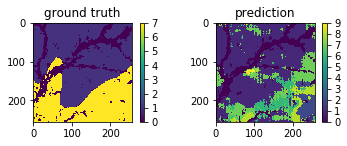

In [27]:
idx = 70
_pred = np.argmax(Y_preds[idx,:,:,:], axis=2)
_tst = np.argmax(yy[idx,:,:,:], axis=2)
plt.subplot(221)
plt.imshow(_tst)
plt.colorbar()
plt.title('ground truth')
plt.subplot(222)
plt.imshow(_pred)
plt.colorbar()
plt.title('prediction')

#### calculate the accuracy

In [28]:
acc_list = []
for i in range(yy.shape[0]):
    tmp_pred = np.argmax(Y_preds[i,:,:,:], axis=2)
    tmp_tst = np.argmax(yy[i,:,:,:], axis=2)
    acc_list.append(np.where(tmp_pred == tmp_tst)[0].shape[0]/(256*256))
print('mean accuracy on test data is {0}, std is {1}'.format(np.mean(acc_list), np.std(acc_list)))
print('max is {0}, min is {1}'.format(max(acc_list), min(acc_list)))

mean accuracy on test data is 0.5370923822576349, std is 0.21697654456103174
max is 0.9677886962890625, min is 0.0312347412109375
